## Parte I. Carácterísticas de calidad de los datos

In [1]:
import pandas as pd

In [2]:
# Carga de datos desde la ruta en Colab
ruta_archivo = 'Datos.xlsx'
excel_data = pd.ExcelFile(ruta_archivo)

# Mostrar nombres de las hojas en el archivo Excel
print("Hojas disponibles en el archivo:")
print(excel_data.sheet_names)

Hojas disponibles en el archivo:
['CLIENTE1', 'CLIENTE2', 'CLIENTE3', 'CLIENTE4', 'CLIENTE5', 'CLIENTE6', 'CLIENTE7', 'CLIENTE8', 'CLIENTE9', 'CLIENTE10', 'CLIENTE11', 'CLIENTE12', 'CLIENTE13', 'CLIENTE14', 'CLIENTE15', 'CLIENTE16', 'CLIENTE17', 'CLIENTE18', 'CLIENTE19', 'CLIENTE20']


In [3]:
# Mostrar el nombre de las hojas para validar que estén cargadas completamente
excel_data.sheet_names

['CLIENTE1',
 'CLIENTE2',
 'CLIENTE3',
 'CLIENTE4',
 'CLIENTE5',
 'CLIENTE6',
 'CLIENTE7',
 'CLIENTE8',
 'CLIENTE9',
 'CLIENTE10',
 'CLIENTE11',
 'CLIENTE12',
 'CLIENTE13',
 'CLIENTE14',
 'CLIENTE15',
 'CLIENTE16',
 'CLIENTE17',
 'CLIENTE18',
 'CLIENTE19',
 'CLIENTE20']

In [4]:
# Crear un diccionario con un DataFrame por cada hoja
dataframes_dict = {sheet: excel_data.parse(sheet) for sheet in excel_data.sheet_names}

In [5]:
# Crear un resumen del número total de registros por variable para cada cliente
summary_dict = {}

for sheet_name, df in dataframes_dict.items():
    summary = df.notnull().sum()  # Contar valores no nulos por columna
    summary_dict[sheet_name] = summary

# Convertir el resumen en un DataFrame para visualizar los resultados
summary_df = pd.DataFrame(summary_dict)

# Transponer el DataFrame para que las filas representen los clientes
summary_df = summary_df.T
summary_df.index.name = "Cliente"

# Mostrar el resumen
print(summary_df)

           Fecha  Presion  Temperatura  Volumen
Cliente                                        
CLIENTE1   43412    43412        43412    43412
CLIENTE2   41382    41382        41382    41382
CLIENTE3   42248    42248        42248    42248
CLIENTE4   42305    42305        42305    42305
CLIENTE5   43415    43415        43415    43415
CLIENTE6   42808    42808        42808    42808
CLIENTE7   41776    41776        41776    41776
CLIENTE8   43147    43147        43147    43147
CLIENTE9   42428    42428        42428    42428
CLIENTE10  41059    41059        41059    41059
CLIENTE11  42248    42248        42248    42248
CLIENTE12  41776    41776        41776    41776
CLIENTE13  41059    41059        41059    41059
CLIENTE14  43415    43415        43415    43415
CLIENTE15  42428    42428        42428    42428
CLIENTE16  43147    43147        43147    43147
CLIENTE17  43412    43412        43412    43412
CLIENTE18  41382    41382        41382    41382
CLIENTE19  42305    42305        42305  

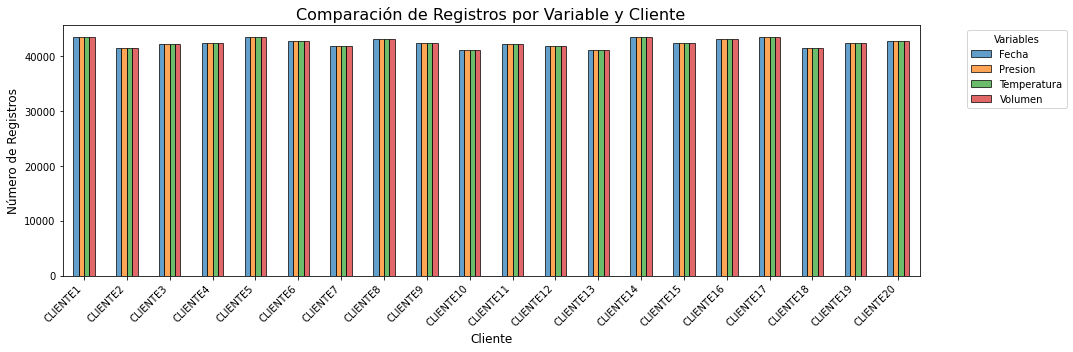

In [6]:
import matplotlib.pyplot as plt

# Preparar los datos para el gráfico
summary_df_plot = summary_df.copy()
summary_df_plot.plot(kind='bar', figsize=(15, 5), edgecolor="black", alpha=0.7)

# Configuración del gráfico
plt.title("Comparación de Registros por Variable y Cliente", fontsize=16)
plt.xlabel("Cliente", fontsize=12)
plt.ylabel("Número de Registros", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Variables", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [73]:
# Concatenar todas las hojas en un solo DataFrame, añadiendo una columna con el nombre del cliente
combined_df = pd.concat(
    [excel_data.parse(sheet).assign(Cliente=sheet) for sheet in excel_data.sheet_names],
    ignore_index=True
)

In [8]:
# Tipo de datos de cada una de las columnas del DataFrame combinado
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847960 entries, 0 to 847959
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Fecha        847960 non-null  datetime64[ns]
 1   Presion      847960 non-null  float64       
 2   Temperatura  847960 non-null  float64       
 3   Volumen      847960 non-null  float64       
 4   Cliente      847960 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 32.3+ MB


In [9]:
# Inicializar un diccionario para almacenar los resultados del análisis de calidad
quality_report = {}

# Process each sheet individually to assess quality
for sheet in excel_data.sheet_names:
    df = excel_data.parse(sheet)
    report = {
        "Total Columns": df.shape[1],
        "Total Rows": df.shape[0],
        "Missing Values (Total)": df.isnull().sum().sum(),
        "Missing Values (Columns)": df.isnull().sum().to_dict(),
        "Column Data Types": df.dtypes.to_dict(),
        "Duplicated Rows": df.duplicated().sum(),
    }
    quality_report[sheet] = report

#Converir en DataFrame para mejorar la vizualización
quality_df = pd.DataFrame(quality_report).T

In [11]:
quality_df.head(21)

,Total Columns,Total Rows,Missing Values (Total),Missing Values (Columns),Column Data Types,Duplicated Rows
CLIENTE1,4,43412,0,"{'Fecha': 0, 'Presion': 0, 'Temperatura': 0, '...","{'Fecha': datetime64[ns], 'Presion': float64, ...",0
CLIENTE2,4,41382,0,"{'Fecha': 0, 'Presion': 0, 'Temperatura': 0, '...","{'Fecha': datetime64[ns], 'Presion': float64, ...",0
CLIENTE3,4,42248,0,"{'Fecha': 0, 'Presion': 0, 'Temperatura': 0, '...","{'Fecha': datetime64[ns], 'Presion': float64, ...",0
CLIENTE4,4,42305,0,"{'Fecha': 0, 'Presion': 0, 'Temperatura': 0, '...","{'Fecha': datetime64[ns], 'Presion': float64, ...",0
CLIENTE5,4,43415,0,"{'Fecha': 0, 'Presion': 0, 'Temperatura': 0, '...","{'Fecha': datetime64[ns], 'Presion': float64, ...",0
CLIENTE6,4,42808,0,"{'Fecha': 0, 'Presion': 0, 'Temperatura': 0, '...","{'Fecha': datetime64[ns], 'Presion': float64, ...",0
CLIENTE7,4,41776,0,"{'Fecha': 0, 'Presion': 0, 'Temperatura': 0, '...","{'Fecha': datetime64[ns], 'Presion': float64, ...",0
CLIENTE8,4,43147,0,"{'Fecha': 0, 'Presion': 0, 'Temperatura': 0, '...","{'Fecha': datetime64[ns], 'Presion': float64, ...",0
CLIENTE9,4,42428,0,"{'Fecha': 0, 'Presion': 0, 'Temperatura': 0, '...","{'Fecha': datetime64[ns], 'Presion': float64, ...",0
CLIENTE10,4,41059,0,"{'Fecha': 0, 'Presion': 0, 'Temperatura': 0, '...","{'Fecha': datetime64[ns], 'Presion': float64, ...",0


In [16]:
# Seleccionar únicamente las columnas numéricas para el análisis
numeric_columns = combined_df.select_dtypes(include='number').columns

# Especificar el orden personalizado de los clientes
custom_order = ['CLIENTE1', 'CLIENTE2', 'CLIENTE3', 'CLIENTE4', 'CLIENTE5',
                'CLIENTE6', 'CLIENTE7', 'CLIENTE8', 'CLIENTE9', 'CLIENTE10',
                'CLIENTE11', 'CLIENTE12', 'CLIENTE13', 'CLIENTE14', 'CLIENTE15',
                'CLIENTE16', 'CLIENTE17', 'CLIENTE18', 'CLIENTE19', 'CLIENTE20']

# Crear un diccionario para almacenar un DataFrame por cada variable
analysis_dict = {}

for variable in numeric_columns:
    # Realizar el análisis estadístico para la variable actual
    df_stats = combined_df.groupby('Cliente')[variable].agg(['mean', 'var', 'min', 'max'])

    # Cambiar nombres de columnas
    df_stats.columns = ['Media', 'Varianza', 'Mínimo', 'Máximo']

    # Aplicar el orden personalizado
    df_stats = df_stats.loc[pd.CategoricalIndex(df_stats.index, categories=custom_order, ordered=True)].dropna(how="all")

    # Almacenar en el diccionario
    analysis_dict[variable] = df_stats

# Mostrar los resultados de un ejemplo
for variable, df in analysis_dict.items():
    print(f"Análisis estadístico para la variable: {variable}")
    print(df)
    print("\n")

Análisis estadístico para la variable: Presion
               Media  Varianza     Mínimo     Máximo
Cliente                                             
CLIENTE1   17.535934  0.128386  15.742337  18.074274
CLIENTE10  17.473694  0.018207  16.469864  18.573079
CLIENTE11   3.545512  0.006848   2.934873   3.954039
CLIENTE12  17.833667  0.175134  13.740922  20.232110
CLIENTE13  17.492521  0.014416  16.505077  18.471047
CLIENTE14  17.517128  0.136231  13.616877  20.028395
CLIENTE15  17.495812  0.019406  16.514496  18.493234
CLIENTE16  16.705058  0.242393  14.734521  19.440780
CLIENTE17  17.533599  0.144412  15.265703  18.445378
CLIENTE18  17.554599  0.063612  16.215105  17.821359
CLIENTE19  17.667217  0.105514  16.247484  18.258619
CLIENTE2   17.526440  0.101751  16.129015  18.106402
CLIENTE20  17.579587  0.166682  14.849737  18.578203
CLIENTE3    3.569593  0.006499   3.057171   4.037030
CLIENTE4   17.639754  0.152739  15.214996  20.112931
CLIENTE5   17.489345  0.137192  14.489896  19.009352

In [18]:
# Crear un diccionario para almacenar un DataFrame con los duplicados por cliente
duplicated_records = {}

for cliente, group in combined_df.groupby('Cliente'):
    # Identificar filas con fechas duplicadas
    duplicated_df = group[group.duplicated(subset='Fecha', keep=False)]
    duplicated_records[cliente] = duplicated_df

# Mostrar un ejemplo de resultados
for cliente, df in duplicated_records.items():
    print(f"Registros duplicados para el cliente: {cliente}")
    print(df)
    print("\n")

Registros duplicados para el cliente: CLIENTE1
Empty DataFrame
Columns: [Fecha, Presion, Temperatura, Volumen, Cliente]
Index: []


Registros duplicados para el cliente: CLIENTE10
Empty DataFrame
Columns: [Fecha, Presion, Temperatura, Volumen, Cliente]
Index: []


Registros duplicados para el cliente: CLIENTE11
                     Fecha   Presion  Temperatura     Volumen    Cliente
424377 2019-01-30 13:00:00  3.554041    28.487930  116.624994  CLIENTE11
424378 2019-01-30 13:00:00  3.480825    28.538652  100.330095  CLIENTE11


Registros duplicados para el cliente: CLIENTE12
Empty DataFrame
Columns: [Fecha, Presion, Temperatura, Volumen, Cliente]
Index: []


Registros duplicados para el cliente: CLIENTE13
Empty DataFrame
Columns: [Fecha, Presion, Temperatura, Volumen, Cliente]
Index: []


Registros duplicados para el cliente: CLIENTE14
Empty DataFrame
Columns: [Fecha, Presion, Temperatura, Volumen, Cliente]
Index: []


Registros duplicados para el cliente: CLIENTE15
Empty DataFrame
Col

## Parte II. Técnicas de limpieza de datos

In [43]:
# Crear un diccionario para almacenar los DataFrames resultantes
cleaned_dataframes = {}

for cliente, group in combined_df.groupby('Cliente'):
    # Seleccionar el registro con el valor máximo para cada fecha
    #cleaned_df = group.loc[group.groupby('Fecha').idxmax(numeric_only=True).iloc[:, 0]]
    cleaned_df = group.loc[group.groupby('Fecha').idxmax().iloc[:, 0]]
    cleaned_dataframes[cliente] = cleaned_df

# Mostrar un ejemplo de los resultados
for cliente, df in cleaned_dataframes.items():
    print(f"DataFrame limpio para el cliente: {cliente}")
    print(df)
    print("\n")

C:\Users\A376329\Anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1309: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  keys, values, mutated = self.grouper.apply(f, data, self.axis)


DataFrame limpio para el cliente: CLIENTE1
                    Fecha    Presion  Temperatura    Volumen   Cliente  \
0     2019-01-14 00:00:00  17.732563    28.209354  20.969751  CLIENTE1   
1     2019-01-14 01:00:00  17.747776    28.518614  17.845739  CLIENTE1   
2     2019-01-14 02:00:00  17.758916    28.230191  20.975914  CLIENTE1   
3     2019-01-14 03:00:00  17.727940    27.811509  20.592299  CLIENTE1   
4     2019-01-14 04:00:00  17.746484    27.795293  21.690626  CLIENTE1   
...                   ...        ...          ...        ...       ...   
43407 2023-12-31 19:00:00  15.917746    27.012471   9.288101  CLIENTE1   
43408 2023-12-31 20:00:00  15.905184    26.428474   4.746021  CLIENTE1   
43409 2023-12-31 21:00:00  15.915647    26.275375  13.040214  CLIENTE1   
43410 2023-12-31 22:00:00  15.934438    26.056568   9.736423  CLIENTE1   
43411 2023-12-31 23:00:00  15.885152    26.504426  10.038946  CLIENTE1   

       Cluster_x  Cluster_y  
0              0          3  
1       

## Parte III. Identificación de técnicas para un primer entendimiento de los datos

C:\Users\A376329\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


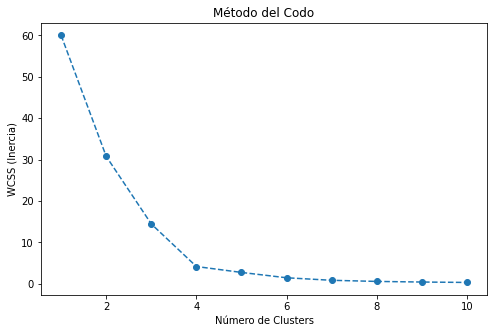

             Presion  Temperatura     Volumen  Cluster
Cliente                                               
CLIENTE1   17.535934    25.575853   19.976401        3
CLIENTE10  17.473694    23.500489   11.788209        0
CLIENTE11   3.545512    26.307152  131.648637        2
CLIENTE12  17.833667    26.689551   33.731496        3
CLIENTE13  17.492521    21.591365   10.276088        0
CLIENTE14  17.517128    26.658520    7.301900        3
CLIENTE15  17.495812    24.026489   12.553861        0
CLIENTE16  16.705058    27.481311  178.133946        1
CLIENTE17  17.533599    25.849342   20.564425        3
CLIENTE18  17.554599    27.668722   61.758087        3
CLIENTE19  17.667217    23.223832   15.918062        0
CLIENTE2   17.526440    27.673040   61.819045        3
CLIENTE20  17.579587    25.407173  160.816734        1
CLIENTE3    3.569593    26.348434  117.500121        2
CLIENTE4   17.639754    23.241102   17.351570        0
CLIENTE5   17.489345    23.665282    7.817773        0
CLIENTE6  

In [75]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés para segmentación
variables = ['Presion', 'Temperatura', 'Volumen']
segmentation_data = combined_df.groupby('Cliente')[variables].mean()  

# Escalar los datos
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Encontrar el número óptimo de clusters usando el método del codo
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(segmentation_data_scaled)
    wcss.append(kmeans.inertia_)

# Grafica método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Inercia)')
plt.show()

# Elegir un número óptimo de clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
segmentation_data['Cluster'] = kmeans.fit_predict(segmentation_data_scaled)

# Mostrar los resultados
print(segmentation_data)

In [85]:
combined_df = combined_df.merge(segmentation_data[['Cluster']], left_on='Cliente', right_index=True, how='left')
combined_df.head()

,Fecha,Presion,Temperatura,Volumen,Cliente,Cluster
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1,3
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1,3
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1,3
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1,3
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1,3


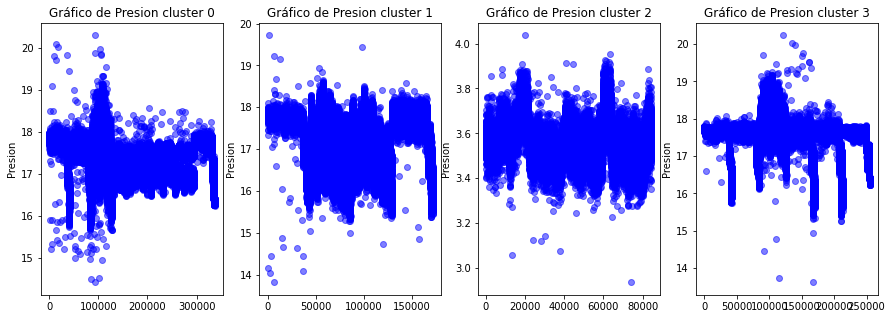

In [86]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(optimal_clusters):
    x = combined_df["Presion"][combined_df["Cluster"] == i]
    ax = axes[i]
    ax.scatter(range(len(x)), x, color='blue', alpha=0.5)
    ax.set_title(f'Gráfico de Presion cluster {i}')
    ax.set_ylabel('Presion')

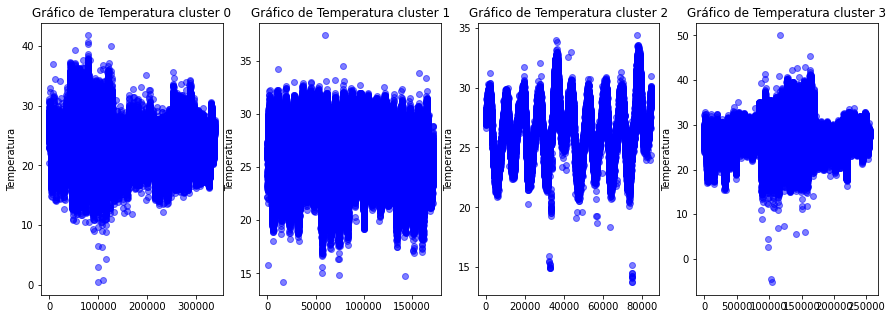

In [87]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(optimal_clusters):
    x = combined_df["Temperatura"][combined_df["Cluster"] == i]
    ax = axes[i]
    ax.scatter(range(len(x)), x, color='blue', alpha=0.5)
    ax.set_title(f'Gráfico de Temperatura cluster {i}')
    ax.set_ylabel('Temperatura')

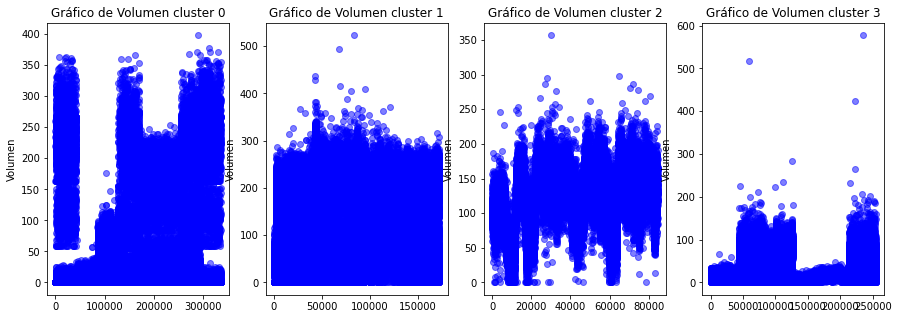

In [88]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(optimal_clusters):
    x = combined_df["Volumen"][combined_df["Cluster"] == i]
    ax = axes[i]
    ax.scatter(range(len(x)), x, color='blue', alpha=0.5)
    ax.set_title(f'Gráfico de Volumen cluster {i}')
    ax.set_ylabel('Volumen')

In [89]:
# Crear un diccionario para almacenar outliers por variable
outliers_dict = {}

for variable in numeric_columns:
    outliers_list = []
    for cluster, group in combined_df.groupby('Cluster'):
        Q1 = group[variable].quantile(0.25)
        Q3 = group[variable].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = group[(group[variable] < lower_bound) | (group[variable] > upper_bound)]
        outliers_list.append({'Cluster': cluster, 'Outliers': outliers})

    outliers_dict[variable] = outliers_list

for variable, outliers in outliers_dict.items():
    print(f"Datos atípicos para la variable: {variable}")
    for entry in outliers:
        print(f"Cluster: {entry['Cluster']}")
        print(entry['Outliers'])
        print("\n")
        
        cluster = entry['Cluster']
        outlier_indices = entry['Outliers'].index
        combined_df = combined_df[~((combined_df['Cluster'] == cluster) & (combined_df.index.isin(outlier_indices)))]


Datos atípicos para la variable: Presion
Cluster: 0
                     Fecha    Presion  Temperatura   Volumen    Cliente  \
127646 2019-02-08 20:00:00  15.897255    27.249651  0.000000   CLIENTE4   
128540 2019-03-19 02:00:00  18.092890    26.497081  0.000000   CLIENTE4   
129576 2019-05-07 08:00:00  18.516168    25.819574  0.009076   CLIENTE4   
131429 2019-07-25 20:00:00  15.214996    20.374766  0.000000   CLIENTE4   
131866 2019-08-13 01:00:00  15.327517    19.306879  0.000000   CLIENTE4   
...                    ...        ...          ...       ...        ...   
805147 2023-12-31 19:00:00  16.354683    27.263543  0.000000  CLIENTE19   
805148 2023-12-31 20:00:00  16.361386    27.012322  0.010362  CLIENTE19   
805149 2023-12-31 21:00:00  16.322911    27.597079  0.000000  CLIENTE19   
805150 2023-12-31 22:00:00  16.316369    27.341658  0.014369  CLIENTE19   
805151 2023-12-31 23:00:00  16.335212    26.760407  0.000000  CLIENTE19   

        Cluster  
127646        0  
128540     

Datos atípicos para la variable: Volumen
Cluster: 0
                     Fecha    Presion  Temperatura     Volumen    Cliente  \
127097 2019-01-16 07:00:00  17.790087    25.296586  243.304276   CLIENTE4   
127098 2019-01-16 08:00:00  17.849953    26.102842  163.000000   CLIENTE4   
127099 2019-01-16 09:00:00  17.836919    25.610589  260.184302   CLIENTE4   
127100 2019-01-16 10:00:00  17.849079    25.697681  234.788039   CLIENTE4   
127101 2019-01-16 11:00:00  17.788127    25.339002  219.877043   CLIENTE4   
...                    ...        ...          ...         ...        ...   
805084 2023-12-29 04:00:00  16.310910    26.986343    2.196890  CLIENTE19   
805085 2023-12-29 05:00:00  16.342433    25.963274    0.901239  CLIENTE19   
805087 2023-12-29 07:00:00  16.317225    26.199123    4.549914  CLIENTE19   
805088 2023-12-29 08:00:00  16.365238    25.290493    2.156144  CLIENTE19   
805099 2023-12-29 19:00:00  16.303976    26.603440   13.276057  CLIENTE19   

        Cluster  
12709

In [84]:
combined_df = combined_df.drop('Cluster_y', axis=1)
combined_df.head()

,Fecha,Presion,Temperatura,Volumen,Cliente
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1


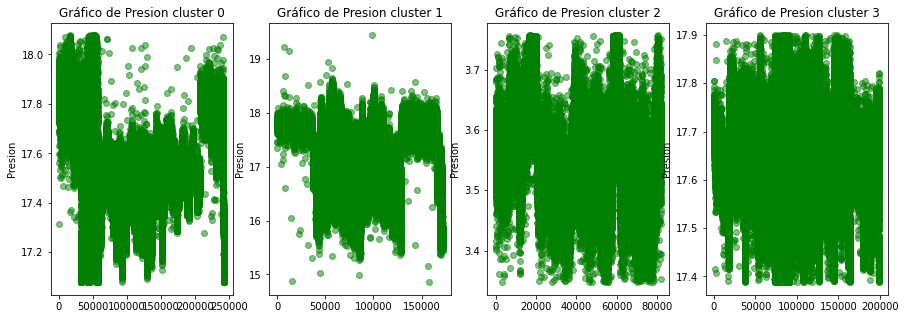

In [96]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(optimal_clusters):
    x = combined_df["Presion"][combined_df["Cluster"] == i]
    ax = axes[i]
    ax.scatter(range(len(x)), x, color='green', alpha=0.5)
    ax.set_title(f'Gráfico de Presion cluster {i}')
    ax.set_ylabel('Presion')

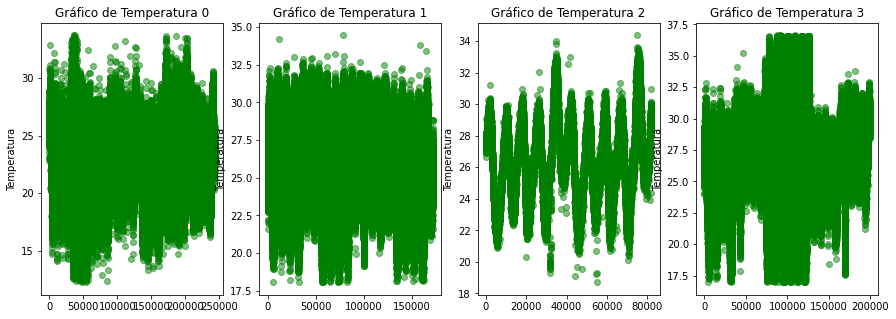

In [97]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(optimal_clusters):
    x = combined_df["Temperatura"][combined_df["Cluster"] == i]
    ax = axes[i]
    ax.scatter(range(len(x)), x, color='green', alpha=0.5)
    ax.set_title(f'Gráfico de Temperatura {i}')
    ax.set_ylabel('Temperatura')

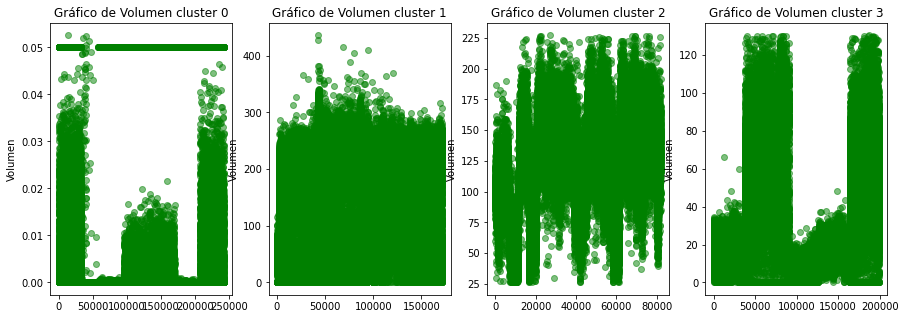

In [98]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(optimal_clusters):
    x = combined_df["Volumen"][combined_df["Cluster"] == i]
    ax = axes[i]
    ax.scatter(range(len(x)), x, color='green', alpha=0.5)
    ax.set_title(f'Gráfico de Volumen cluster {i}')
    ax.set_ylabel('Volumen')